Author: Niamh Hogan

# Knock airport Weather Plots

Plot:

- The temperature  
- The mean temperature each day  
- The mean temperature for each month  

- The Windspeed (data missing from this column)  
- The rolling windspeed (over 24 hours)  
- The max windspeed for each day  
- The monthly mean of the daily max windspeeds (nasty section)  

Creating plots to analyse the weather at Knock from years 1996 - 2025 and creating weather plots for year 2024-2025 to allow for a closer analysis of the data. 


In [43]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Variables in dataset
date:  -  Date and Time (utc)  
rain:  -  Precipitation Amount (mm)  
temp:  -  Air Temperature (C)  
wetb:  -  Wet Bulb Temperature (C)  
dewpt: -  Dew Point Temperature (C)  
rhum:  -  Relative Humidity (%)  
vappr: -  Vapour Pressure (hPa)  
msl:   -  Mean Sea Level Pressure (hPa)  
wdsp:  -  Mean Wind Speed (knot)  
wddir: -  Predominant Wind Direction (degree)  
ww:    -  Synop code for Present Weather  
w:     -  Synop code for Past Weather  
sun:   -  Sunshine duration (hours)  
vis:   -  Visibility (m)  
clht:  -  Cloud height (100's of ft) - 999 if none   
clamt: -  Cloud amount  
ind:   -  Indicator

## Step 1: Clean Data

In [44]:
# Read in csv file from url via pandas
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23, low_memory=False)
df.tail(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
256431,31-oct-2025 22:00,0,0.5,0,7.8,0,7.6,7.3,10.3,97,...,2,10,2,160,,,0.0,6000,43,8
256432,31-oct-2025 23:00,0,0.8,0,7.4,0,7.3,7.2,10.1,99,...,2,8,2,160,,,0.0,9000,46,8
256433,01-nov-2025 00:00,0,0.2,0,7.4,0,7.4,7.3,10.3,100,...,2,7,2,190,,,0.0,25000,1,8


In [45]:
# Confirm data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256434 entries, 0 to 256433
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    256434 non-null  object 
 1   ind     256434 non-null  int64  
 2   rain    256434 non-null  object 
 3   ind.1   256434 non-null  int64  
 4   temp    256434 non-null  float64
 5   ind.2   256434 non-null  int64  
 6   wetb    256434 non-null  float64
 7   dewpt   256434 non-null  float64
 8   vappr   256434 non-null  float64
 9   rhum    256434 non-null  int64  
 10  msl     256434 non-null  object 
 11  ind.3   256434 non-null  int64  
 12  wdsp    256434 non-null  object 
 13  ind.4   256434 non-null  int64  
 14  wddir   256434 non-null  object 
 15  ww      256434 non-null  object 
 16  w       256434 non-null  object 
 17  sun     256434 non-null  float64
 18  vis     256434 non-null  object 
 19  clht    256434 non-null  object 
 20  clamt   256434 non-null  object 
dtypes: float64

In [46]:
# convert date to datetime
df['date'] = pd.to_datetime(df['date'])
df['date']

C:\Users\hniam\AppData\Local\Temp\ipykernel_7576\1203770891.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
256429   2025-10-31 20:00:00
256430   2025-10-31 21:00:00
256431   2025-10-31 22:00:00
256432   2025-10-31 23:00:00
256433   2025-11-01 00:00:00
Name: date, Length: 256434, dtype: datetime64[ns]

Coverting to datetime allows for easier data manipulation and grouping by date & time https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html 

In [47]:
# set datetime as index
df.set_index('date', inplace=True)
df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7


In [48]:
# handling missing values

## Task 1: Temperature plot

Text(0, 0.5, 'Temperature (°C)')

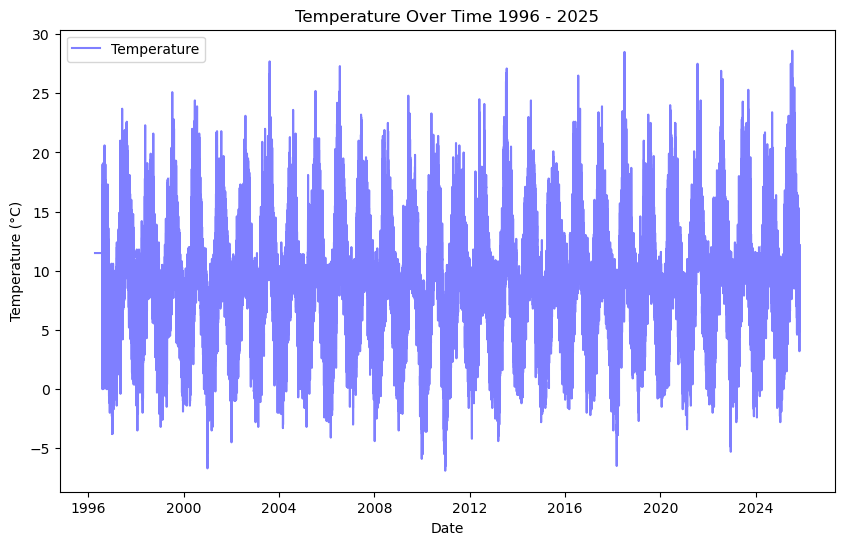

In [49]:
# temperature plot 1996-2025
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='date', y='temp', 
             color='blue', alpha=0.5, label='Temperature')

plt.title('Temperature Over Time 1996 - 2025')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

https://seaborn.pydata.org/generated/seaborn.lineplot.html

Text(0, 0.5, 'Temperature (°C)')

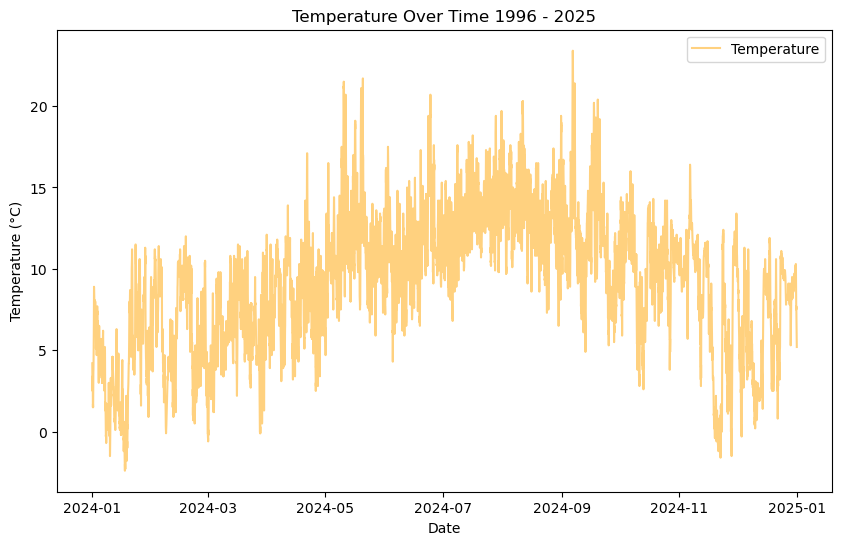

In [50]:
# temperature plot over one year 2024-2025
dateFrom = "01/01/2024 00:00"
dateTo = "01/01/2025 00:00"

plt.figure(figsize=(10, 6))
sns.lineplot(data=df.loc[dateFrom:dateTo], x="date", y="temp", 
             color='orange', alpha=0.5, label='Temperature')

plt.title('Temperature Over Time 1996 - 2025')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html

## Task 2: Plot for mean temp each day 

In [51]:
# Calculate mean temp each day 1996 - 2025
yearFrom = "10-apr-1996 14:00"
yearTo = "01-nov-2025 00:00"

df.loc[yearFrom:yearTo]['temp'].mean()

8.801566484943494

 https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html

In [ ]:
# Plot 

In [52]:
# Calculate mean temp each day over 1 year 2024-2025
df.loc[dateFrom:dateTo]['temp'].mean()

9.08138873079112

In [ ]:
# Plot

## Task 3: Plot mean temp for each month

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

In [53]:
# 1996 - 2025
df["temp"].resample("MS").mean()

date
1996-04-01    11.500000
1996-05-01          NaN
1996-06-01          NaN
1996-07-01    12.650000
1996-08-01    12.946909
                ...    
2025-07-01    15.068280
2025-08-01    15.178495
2025-09-01    11.368056
2025-10-01     9.900134
2025-11-01     7.400000
Freq: MS, Name: temp, Length: 356, dtype: float64

In [54]:
# over 1 year 2024-2025

## Task 4: Windspeed Plot

## Task 5: Rolling Windspeed Plot - Over 24 hours 

## Task 6: Plot for Max Windspeed Per day 

## Task 7: Plot of Monthly Mean of the Daily Max Windspeeds